In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [63]:
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (1)\data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
y = data['diagnosis'].values
x_data = data.drop(['diagnosis'], axis=1)

In [6]:
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


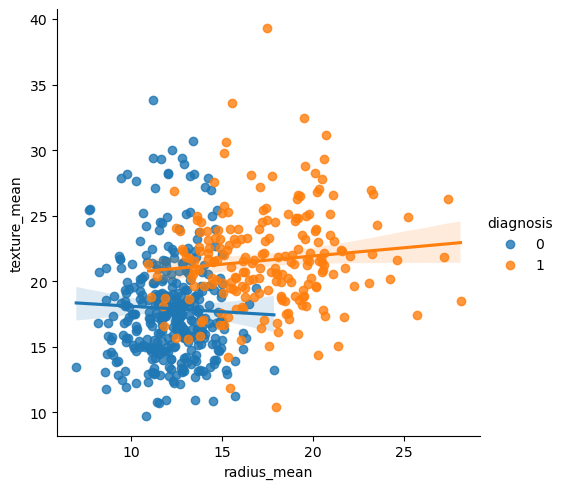

In [8]:
import seaborn as sns
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data)

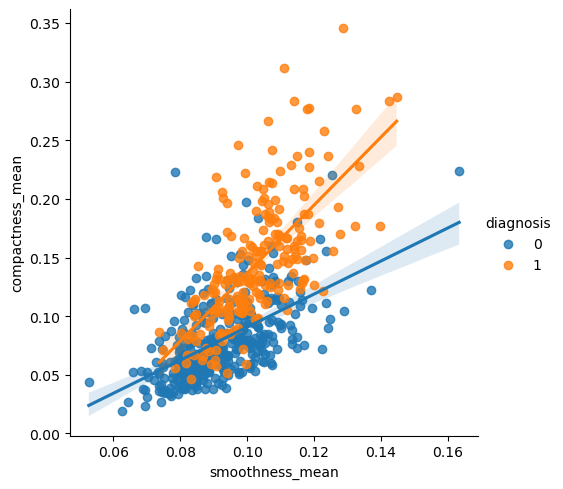

In [9]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', 
           data = data, hue = 'diagnosis')

In [10]:
X = np.array(data.iloc[:, 1:])
y = np.array(data['diagnosis'])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [36]:
import warnings
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9521276595744681

In [14]:
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  13 


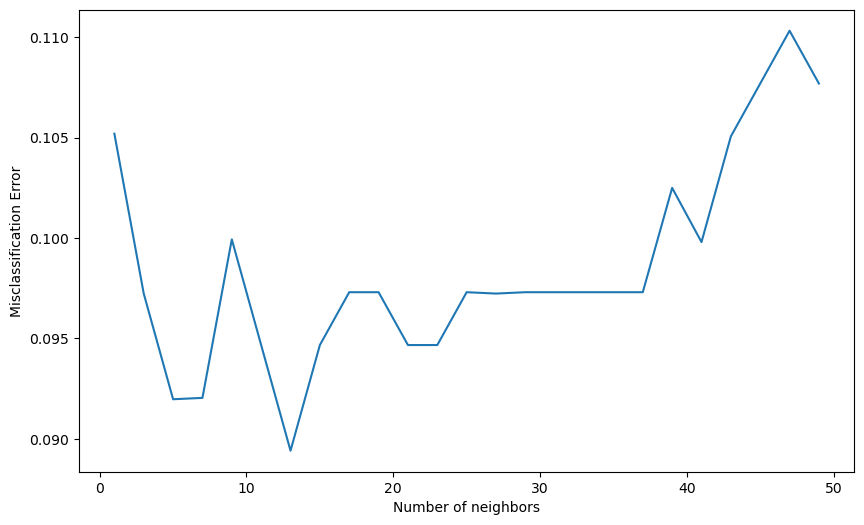

In [15]:
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [16]:
#Remove Unnamed columns
# data.drop(['Unnamed: 32'], axis=1, inplace=True)
# data.shape

In [17]:
#Check for null values
null_values = data.isnull().values.any()
if null_values == True:
    print("There are some missign values in data")
else:
    print("There are no missing values in the dataset")

There are no missing values in the dataset


In [18]:
#Replace M with 1 and Begnin with 0 (else 0)
print("Malignant = 1, Benign = 0")
data["diagnosis"]= data["diagnosis"].map(lambda row: 1 if row=='M' else 0)
data.head()

Malignant = 1, Benign = 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
data.diagnosis.unique() #Making sure that values in diagnosis column has both 1 and 0 values.

array([0])

In [20]:
print("The unique number of data values are")
data.nunique()

The unique number of data values are


diagnosis                    1
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [21]:
data["diagnosis"].value_counts()
print(data["diagnosis"].mean())
#print("Percentage of malignant type dataset is = ",df["diagnosis"].mean()*100)
#This also serves as a sanity check to "diagnosis" column is correctly assigned with Malignant as 1 and Benign as 0

0.0


Total number of data points =   569
Malignant (diagnosis =1) = 0.0%
Benign (diagnosis =0)= 100.0%


<Axes: title={'center': 'Malignant (1) vs Benign Data(0) points'}, xlabel='diagnosis', ylabel='Number of data points'>

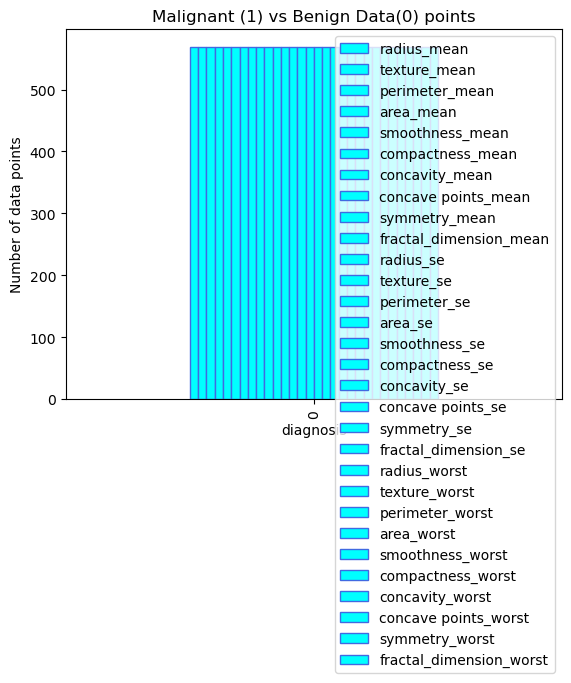

In [22]:
#Plot the number of data points with mailgnant and benign as their diagnosis
print("Total number of data points =  ", len(data))

print("Malignant (diagnosis =1) = {}%".format(round(data["diagnosis"].mean(),3)*100))
                             
print("Benign (diagnosis =0)= {}%".format((1-round(data["diagnosis"].mean(),3))*100))

data.groupby("diagnosis").count().plot.bar(ylabel = "Number of data points", title = "Malignant (1) vs Benign Data(0) points", color = 'cyan', edgecolor = "royalblue")

In [23]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

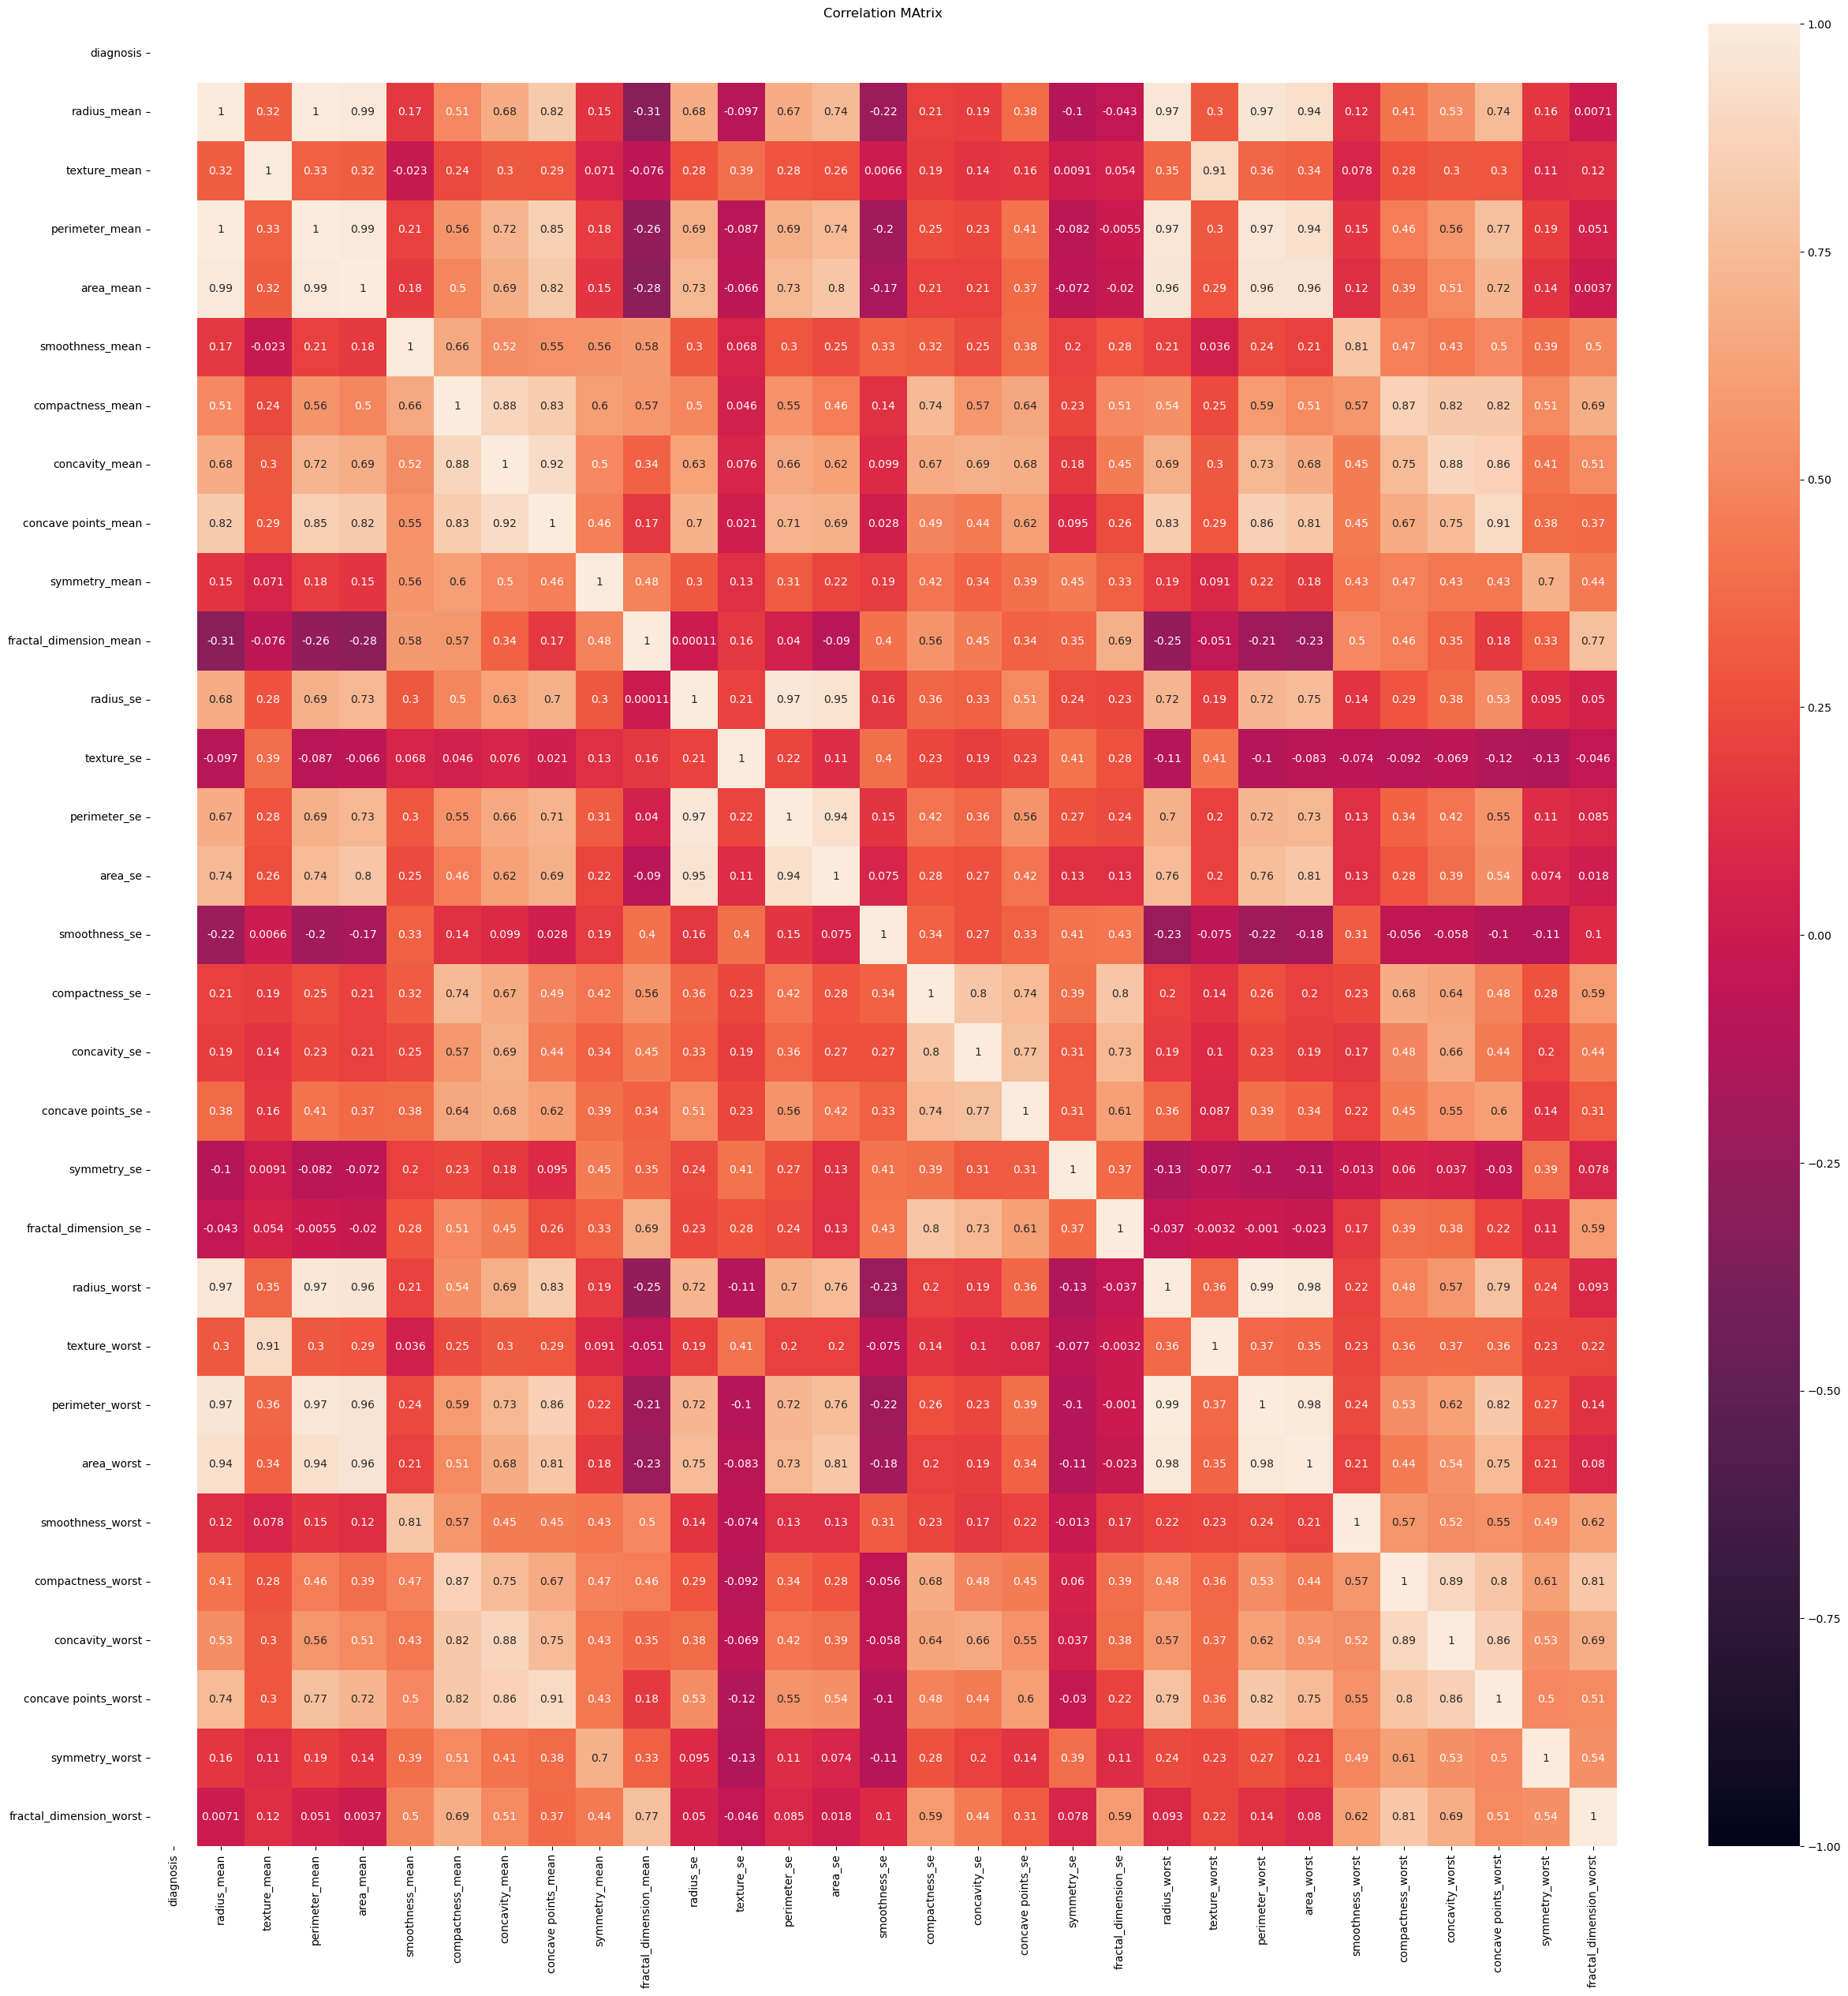

In [24]:
#HEATMAP
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt

plt.figure(figsize =(30,30))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.title("Correlation MAtrix")
plt.show()

Text(0.5, 1.0, 'Diagnoal Plot')

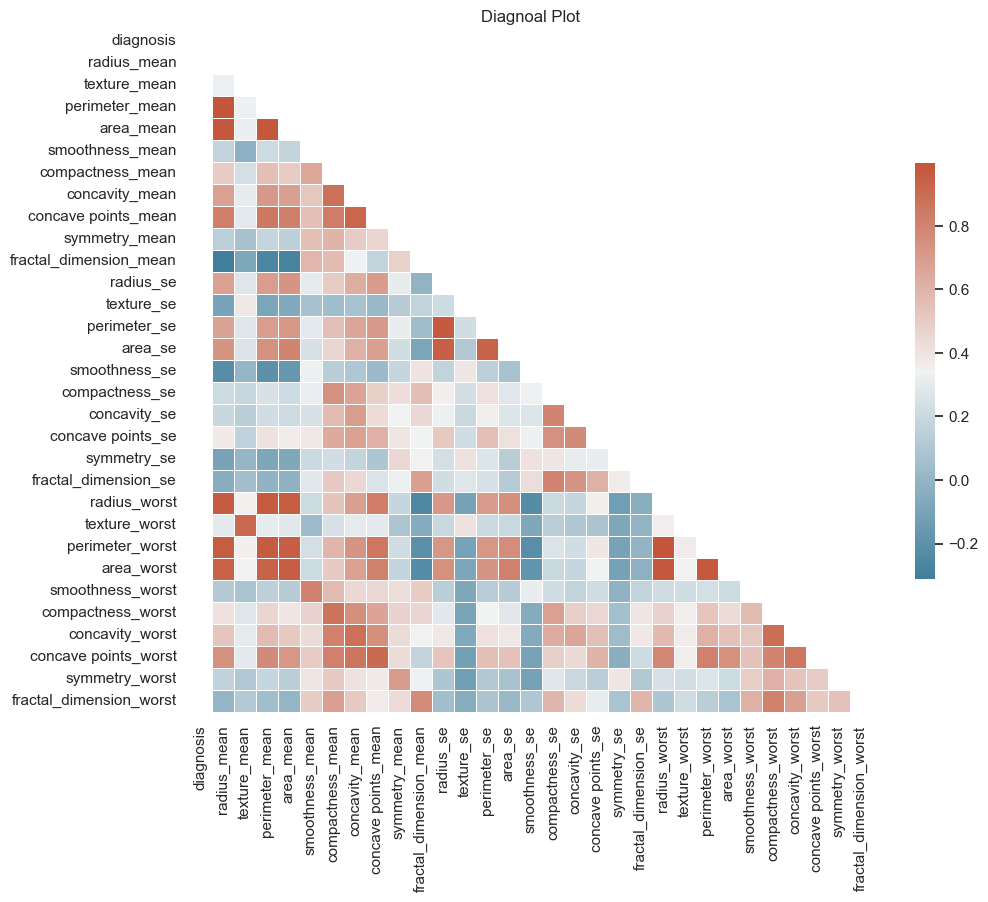

In [25]:
#Diagonal Plot
#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set_theme(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .6})
plt.title("Diagnoal Plot")

In [28]:
# Density Based Outlier Detection System (Local Outlier Factor-LOF)
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
from sklearn.neighbors import LocalOutlierFactor
X = data.drop(['diagnosis'], axis=1) #features
y = data['diagnosis']

model = LocalOutlierFactor(contamination=0.02) #n_neighbors=20 default 
y_pred = model.fit_predict(X) # returns -1 for outliers and 1 for inliers
X_scores = model.negative_outlier_factor_

In [29]:
print('y_pred[:10] ',y_pred[:10])
print('y_pred values and counts: ',np.unique(y_pred,return_counts=True))

y_pred[:10]  [ 1  1  1  1  1 -1  1  1  1  1]
y_pred values and counts:  (array([-1,  1]), array([ 12, 557]))


In [30]:
outliers = pd.DataFrame()
outliers["values"] = y_pred
outliers["values"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    1
Name: values, Length: 569, dtype: int64

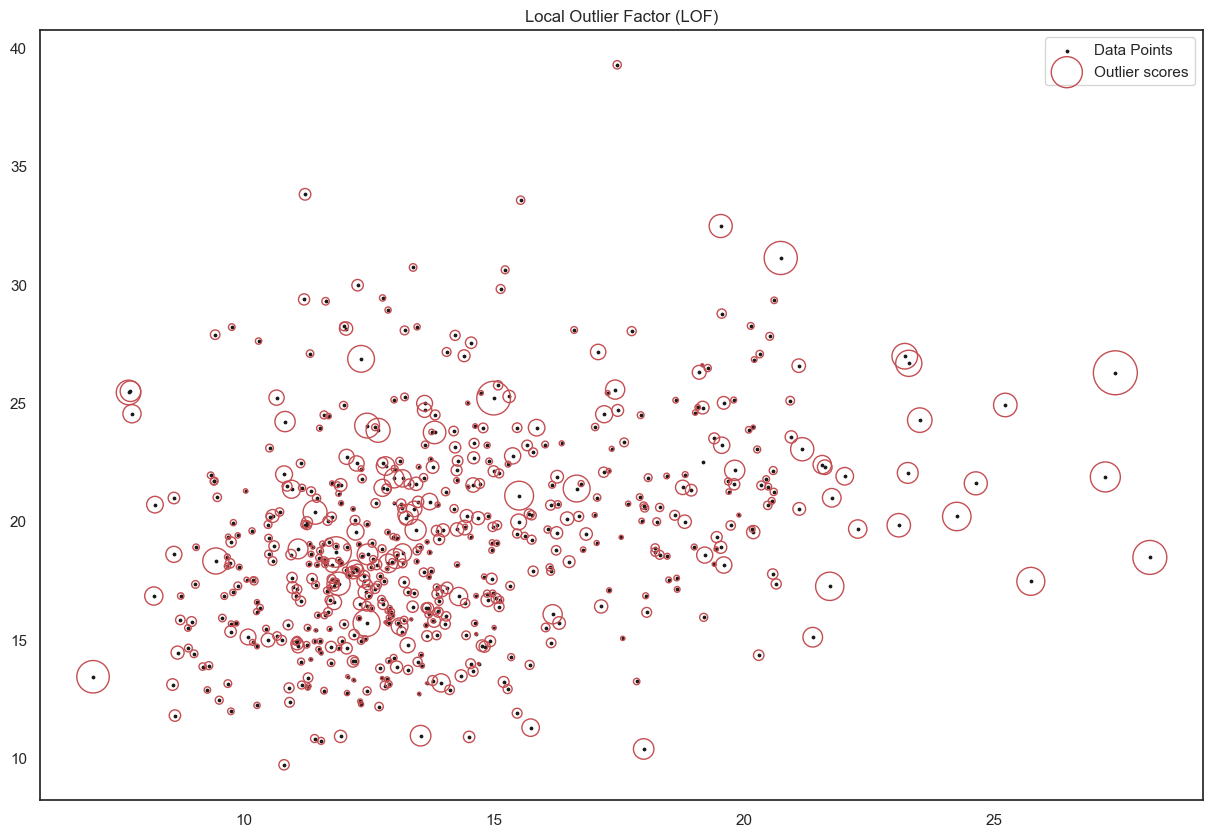

In [31]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html

plt.figure(figsize=(15,10))
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X.iloc[:,0], X.iloc[:,1], color = "k", s = 3, label = "Data Points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.legend()
plt.show()

In [32]:
filt = outliers["values"] == -1
outlier_index = outliers[filt].index.tolist()
#Outliers were removed from the data.
X = X.drop(outlier_index)
y = y.drop(outlier_index).values
print(X.shape)
print(y.shape)

(557, 30)
(557,)


Projecting the 30-dimensional data to 2D


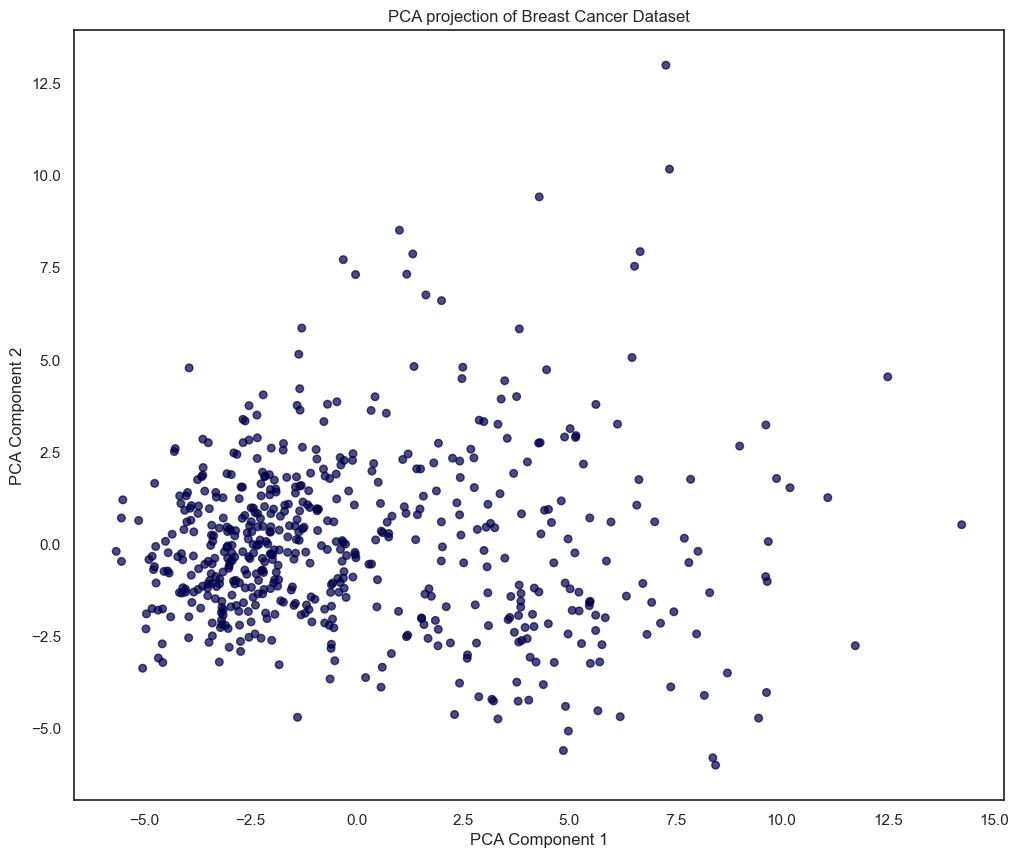

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting the 30-dimensional data to 2D')

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y, alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA projection of Breast Cancer Dataset');

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 557 samples in 0.001s...
[t-SNE] Computed neighbors for 557 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 557 / 557
[t-SNE] Mean sigma: 1.443837
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.749165
[t-SNE] KL divergence after 1000 iterations: 0.908490


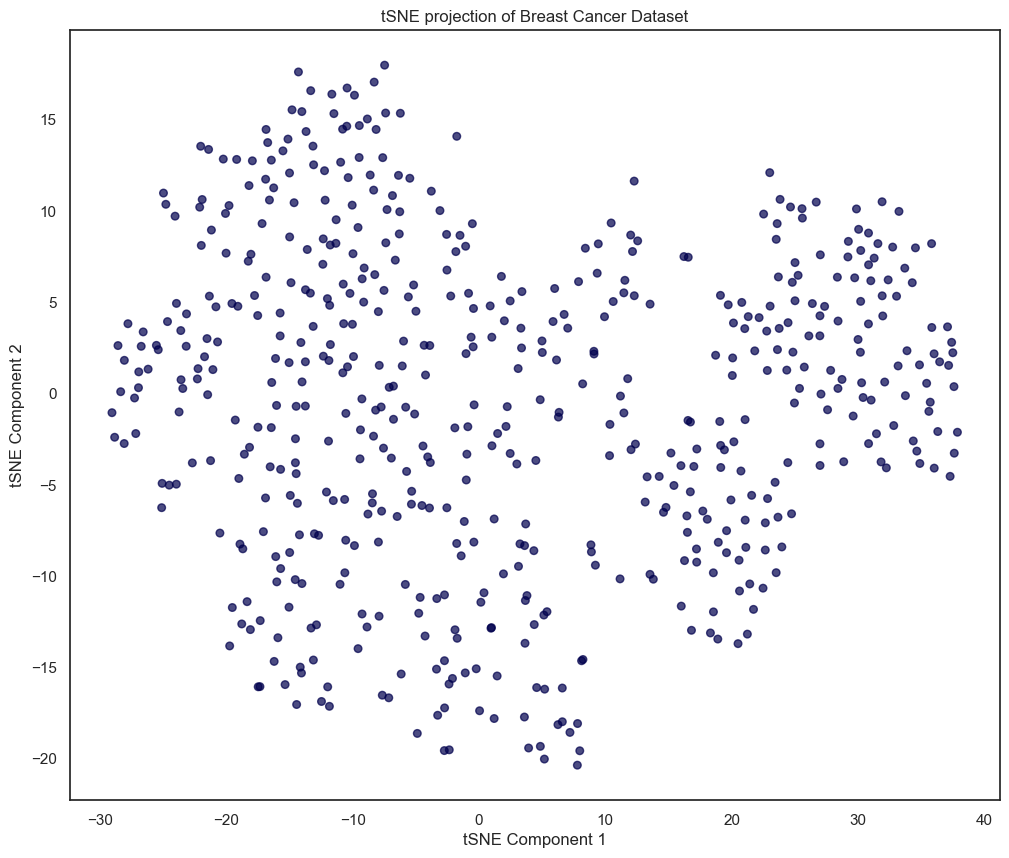

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


X_scaled = StandardScaler().fit_transform(X)

tSNE = TSNE(n_components=2, verbose = 1)#perplexity=40, n_iter=1000 can be used too 
tSNE_results = tSNE.fit_transform(X_scaled)


plt.figure(figsize=(12,10))
plt.scatter(tSNE_results[:, 0], tSNE_results[:, 1], c=y, alpha=0.7, s=30, cmap = 'seismic');
plt.xlabel('tSNE Component 1')
plt.ylabel('tSNE Component 2')
plt.title('tSNE projection of Breast Cancer Dataset');

In [45]:
from sklearn.linear_model import LinearRegression
#set up aliner regression model
LR1 = LinearRegression()

#train the model
LR1.fit(X,y)

LinearRegression()

In [55]:
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis.values

In [56]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , random_state = 1)
rf.fit(x_train, y_train)

print("Random forest algorithm result:" , rf.score(x_test, y_test))

Random forest algorithm result: 1.0


In [59]:
predictions = rf.predict(x_test)

In [64]:
data = data.drop(["id"], axis = 1)
data = data.drop(["Unnamed: 32"], axis = 1)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [67]:
M = data[data.diagnosis == "M"]

In [70]:
B = data[data.diagnosis == "B"]
B.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [71]:
from sklearn.metrics import confusion_matrix
import warnings
cf = confusion_matrix(y_test, predictions)
cf

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[86]])

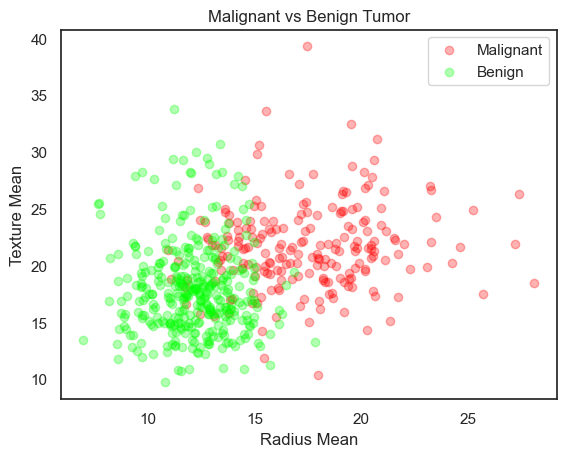

In [72]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [73]:
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis.values
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100 , random_state = 1)
rf.fit(x_train, y_train)

print("Random forest algorithm result:" , rf.score(x_test, y_test))

Random forest algorithm result: 0.9534883720930233


In [76]:
predictions = rf.predict(x_test)
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, predictions)
cf

array([[53,  1],
       [ 3, 29]])

Text(47.25, 0.5, 'y_test')

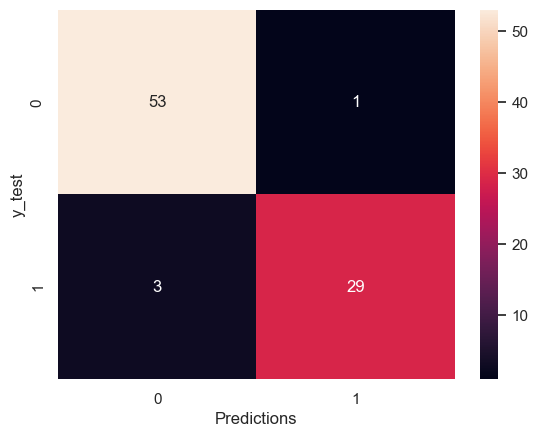

In [77]:
import seaborn as sns

sns.heatmap(cf, annot = True)
plt.xlabel("Predictions")
plt.ylabel("y_test")

In [85]:
    from sklearn.linear_model import LogisticRegression
    import numpy as np

    # Sample data (for classification)
    X = np.array([[1], [2], [3], [4]])
    y = np.array([0, 1, 0, 1]) # Binary classes

    # Create and fit the model
    model = LogisticRegression()
    model.fit(X, y)

    # Get probability estimates
    probabilities = model.predict_proba(X)
    print(probabilities)

[[0.66348945 0.33651055]
 [0.55629738 0.44370262]
 [0.44359449 0.55640551]
 [0.33641276 0.66358724]]


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                0 non-null      float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<Axes: >

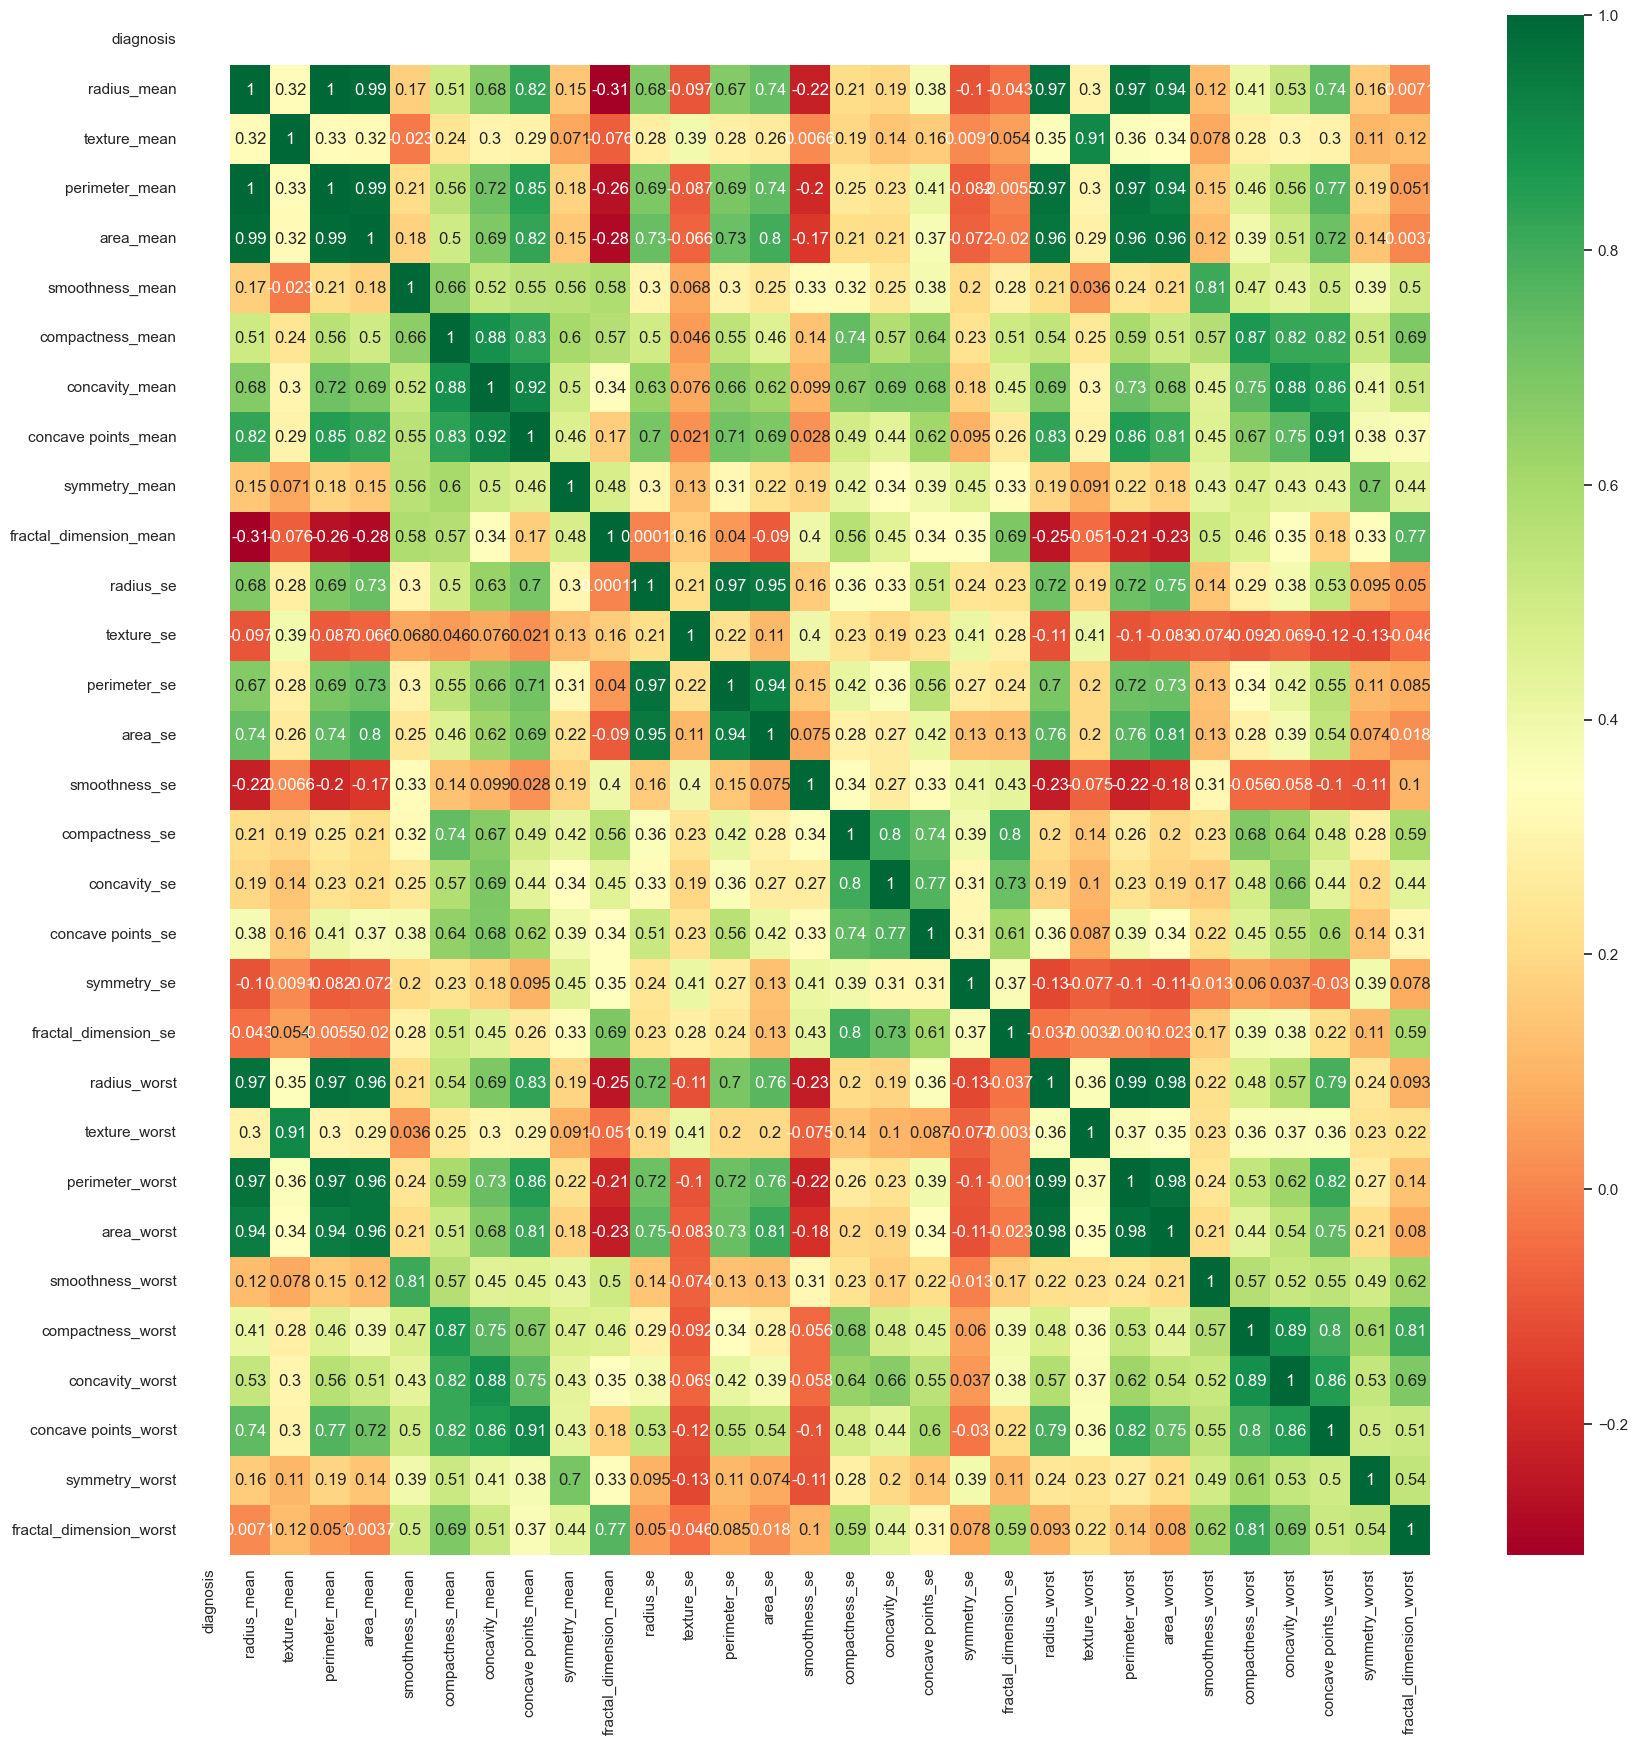

In [91]:
#plot heat map
plt.figure(figsize=(20,20))
sns.heatmap(data.iloc[:,0:31].corr(),annot=True,cmap="RdYlGn")

In [112]:
data = pd.read_csv(r"C:\Users\hp\Downloads\archive (1)\data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [118]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [120]:
data = data.drop(["Unnamed: 32"], axis = 1)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [121]:
data.isnull().values.any()

np.False_

In [123]:
X = data.drop(['diagnosis'],axis = 1)
y = data['diagnosis']
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [124]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

C:\Users\hp\AppData\Local\Temp\ipykernel_30108\1698840095.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  value_counts = pd.value_counts(y,sort = True)


0    357
1    212
Name: count, dtype: int64

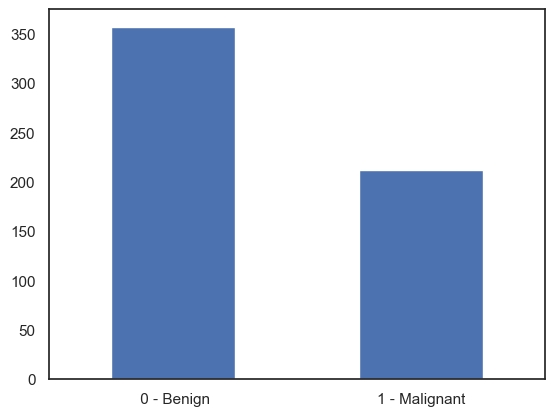

In [126]:
value_counts = pd.value_counts(y,sort = True)
value_counts.plot(kind = 'bar', rot = 0)
Label = [' 0 - Benign', '1 - Malignant']
plt.xticks(range(2), Label)
value_counts

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 1/3, random_state = 10)

In [128]:
from sklearn.preprocessing import StandardScaler
sc=  StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
print(X_train)

[[-0.17884936  1.25786022  0.17516809 ...  0.19221396 -0.56831216
  -1.49604797]
 [-0.24014027 -1.05136303 -0.98445994 ... -0.3714209   0.22904509
   0.69112758]
 [-0.24050654  1.29389851  0.48362914 ...  0.96080695 -0.59647489
  -1.01933434]
 ...
 [ 0.45595516 -0.53573816 -1.61297833 ... -0.15559378  0.38746044
  -0.45813274]
 [-0.24642573 -0.11713946 -0.46726584 ... -1.02449203 -0.92562678
  -0.68753718]
 [ 0.43437157  1.79011816  2.75881932 ...  0.75895425 -0.03850083
  -0.10787132]]


In [129]:
print(X_test)

[[-0.24642112  0.329181   -1.70111005 ...  1.01981005  0.57403852
   0.94515104]
 [-0.24001061 -1.36933171  0.62974227 ... -1.41888116 -0.80065467
  -0.56947782]
 [-0.1780734  -0.16149429 -0.73166103 ... -0.73211615  0.76237677
  -0.39714473]
 ...
 [-0.24015726 -0.39435714  0.49754468 ... -0.94732219 -0.70736563
  -0.14535936]
 [-0.24055972  0.79490669 -0.65512558 ...  2.14242163  2.07018347
   1.21931732]
 [-0.24025013 -0.74087924  1.22115256 ... -1.06936544  0.62332329
  -0.93204875]]


In [130]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred  = classifier.predict(X_test)

In [132]:
print("training  set accuracy : {}".format(classifier.score(X_train,y_train)*100))
print("test set accuracy : {}".format(classifier.score(X_test,y_test)*100))

training  set accuracy : 98.68073878627969
test set accuracy : 97.36842105263158


In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
#   [TN , FP
#    FN , TP]

[[122   3]
 [  2  63]]
0.9736842105263158


In [134]:
y_proba  = classifier.predict_proba(X_test)[:,1]

In [135]:
y_pred_th4 = np.where(classifier.predict_proba(X_test)[:,1]>0.4,1,0) # when  threshold is 0.4

y_pred_th3 = np.where(classifier.predict_proba(X_test)[:,1]>0.3,1,0) #  when threshold is 0.3

y_pred_th2 = np.where(classifier.predict_proba(X_test)[:,1]>0.26,1,0) #  when threshold is 0.26

y_pred_th1 = np.where(classifier.predict_proba(X_test)[:,1]>0.1,1,0) #  when threshold is 0.1

In [136]:
ct = pd.crosstab(y_test,y_pred_th2)
ct

col_0,0,1
row_0,,
0,116,9
1,0,65


In [137]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = classifier, X = X_train,y = y_train, cv = 10)
print("\nCross validation mean accuracy of Logistic Regression = ", cross_validation.mean())
print("\nCross validation std. of Logistic Regression = ", cross_validation.std())
cross_val_res = pd.DataFrame(cross_validation*100)


Cross validation mean accuracy of Logistic Regression =  0.9655049786628733

Cross validation std. of Logistic Regression =  0.03598081823009075


In [138]:
cross_val_res

,0
0,100.000000
1,97.368421
2,97.368421
3,94.736842
4,100.000000
5,92.105263
6,100.000000
7,100.000000
8,94.736842
9,89.189189


In [139]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr, thresholds = roc_curve(y_test, y_proba)
fpr

array([0.   , 0.   , 0.   , 0.008, 0.008, 0.032, 0.032, 0.072, 0.072,
       1.   ])

In [140]:
tpr

array([0.        , 0.01538462, 0.92307692, 0.92307692, 0.96923077,
       0.96923077, 0.98461538, 0.98461538, 1.        , 1.        ])

In [141]:
thresholds

array([           inf, 1.00000000e+00, 7.35492031e-01, 7.31151184e-01,
       6.49876440e-01, 4.73043238e-01, 3.64153068e-01, 2.62007524e-01,
       2.60165514e-01, 4.71935915e-07])

In [142]:
s = roc_auc_score(y_test, y_proba)
s

np.float64(0.9980307692307693)

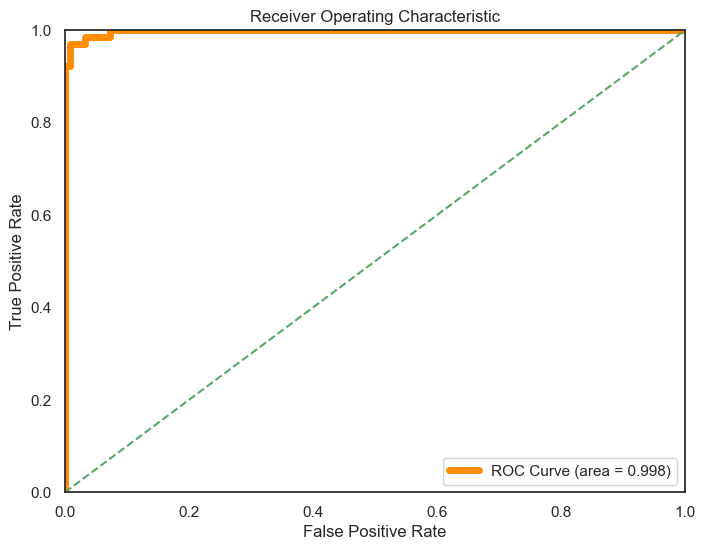

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
from sklearn.metrics import  roc_curve, roc_auc_score
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr, color = 'darkorange', linewidth = 5, label = 'ROC Curve (area = %0.3f)' % (s))
plt.plot([0,1],[0,1], 'g--')

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')